# Data Driven Science and Engineering
## Chapter 2 - Fourier Transformations
To see explinations of Fourier Transformations, please see the markdown file within this folder

----
importing libraries

In [8]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

----
### Example Fourier Series for a continuous Hat Function


$\Biggl\{\begin{align*} 
0 \;for\; x \in [-\pi,-\pi/2 ) \\ 
1+2x/\pi \;for\; x \in [-\pi/2,0) \\
1-2x/\pi \;for\; x\in [0,\pi/2)\\
0 \;for\; x \in [\pi/2,\pi)
\end{align*}$

In [3]:
# define domain
dx = 0.001
L = np.pi
x = np.arange(-1,1,dx) * L
F_x = np.zeros(len(x))
n = int(x.size/4)
# creating function
F_x[0:n] = 0
F_x[n:2*n] = 1 + 2*x[n:2*n]/np.pi
F_x[2*n:3*n] = 1 - 2*x[2*n:3*n]/np.pi
F_x[3*n:]=0

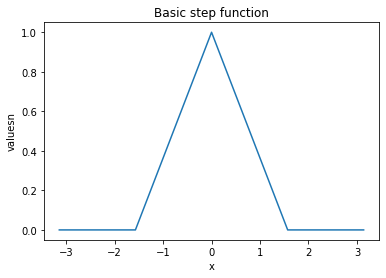

In [4]:
plt.title("Basic step function") 
plt.xlabel("x") 
plt.ylabel("valuesn") 
plt.plot(x,F_x) 
plt.show()

Now doing a fourier transformation on the hat functions

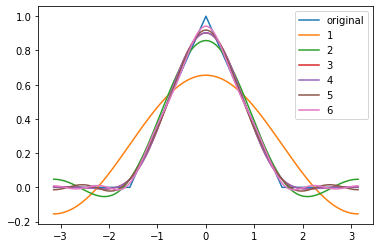

In [13]:
a_0 = np.sum(F_x) * dx 
FFS = a_0/2
plt.plot(x,F_x, label = 'original')
for k in range(1,7):
    inner_portion = np.pi * k * x / L
    a_k = sum(F_x * np.cos(inner_portion)) * dx
    b_k = sum(F_x * np.sin(inner_portion)) * dx
    FFS = FFS + a_k * np.cos(inner_portion) + b_k * np.sin(inner_portion)
    plt.plot(x, FFS, label = k)
plt.legend()
plt.show()

You can clearly see that the function starts to get really good at about the 4th frequency (k = 4)

#### Example disconitiouns hat function
$\Biggl\{\begin{align*} 
0 \;for\; x \in [0,L/4) \\ 
1 \;for\; x \in [L/4,3L/4) \\
0 \;for\; x\in [3L/4,L)\\
\end{align*}$

In [36]:
# define domain
dx = 0.01
L = 10
x = np.arange(0,L,dx)
F_x = np.zeros(len(x))
n = int(x.size/4)
# creating function
F_x[0:n] = 0
F_x[n:2*3*n] = 1
F_x[3*n:]=0

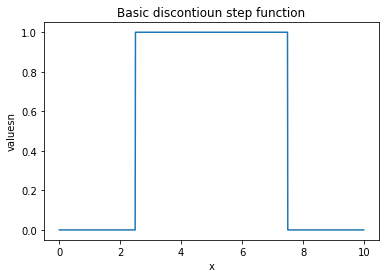

In [37]:
plt.title("Basic discontioun step function") 
plt.xlabel("x") 
plt.ylabel("valuesn") 
plt.plot(x,F_x) 
plt.show()

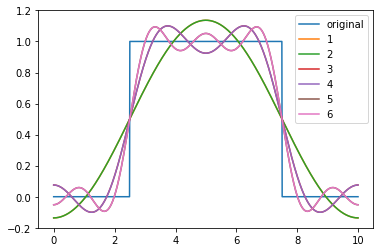

In [39]:
a_0 = np.sum(F_x) * dx * 2.0/L
FFS = a_0/2
plt.plot(x,F_x, label = 'original')
for k in range(1,7):
    inner_portion = 2.0 * np.pi * k * x / L
    a_k = (2.0/L) * sum(F_x * np.cos(inner_portion)) * dx
    b_k = (2.0/L) * sum(F_x * np.sin(inner_portion)) * dx 
    FFS = FFS + a_k * np.cos(inner_portion) + b_k * np.sin(inner_portion)
    plt.plot(x, FFS, label = k)
plt.legend()
plt.show()

Looks pretty good, let's go for 100 itteration, showing every 25ht

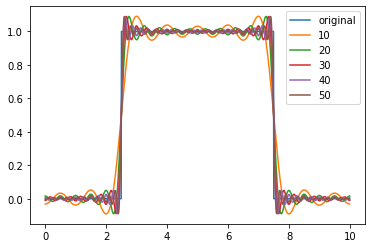

In [42]:
a_0 = np.sum(F_x) * dx * 2.0/L
FFS = a_0/2
plt.plot(x,F_x, label = 'original')
for k in range(1,51):
    inner_portion = 2.0 * np.pi * k * x / L
    a_k = (2.0/L) * sum(F_x * np.cos(inner_portion)) * dx
    b_k = (2.0/L) * sum(F_x * np.sin(inner_portion)) * dx 
    FFS = FFS + a_k * np.cos(inner_portion) + b_k * np.sin(inner_portion)
    if k % 10 == 0:
        plt.plot(x, FFS, label = k)
plt.legend()
plt.show()

### Noise Filtering with FFT
We are going to use the following function $sin(2\pi 50t) + 2sin(2\pi 120t)$ and add guassian noise to it. We'll use FFT to defilter the noise and extract the true underlying aspect


In [140]:
# init
dt = 0.01
t = np.arange(0,1,dt)
Func = np.sin(2*np.pi*5*t) + np.sin(2*np.pi*8*t)
Func_Noise = Func + np.random.normal(0,1,len(t))

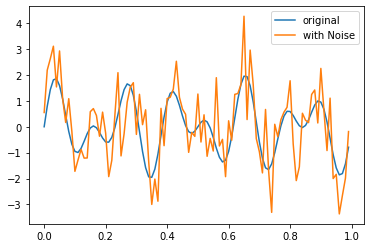

In [141]:
plt.plot(t,Func, label = 'original')
plt.plot(t,Func_Noise, label = 'with Noise')
plt.legend()
plt.show()

Running FFT 

In [142]:
Four_Noise = np.fft.fft(Func_Noise)
PSD = np.real(Four_Noise * np.conj(Four_Noise)/Four_Noise.shape[0]) # getting the Pour Frequency
PSD_Clean  = PSD * (PSD > 10) # zeroing out all other values that don't have a strong index
Four_Clean = Four_Noise  * (PSD > 10)  ; # Zero out small Fourier coeffs. in Y
Func_Clean = np.fft.ifft(Four_Clean); # Inverse FFT for filtered time signal

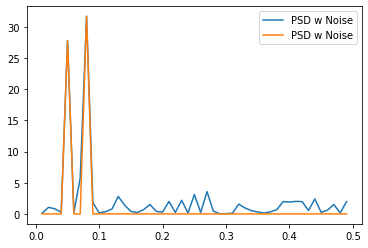

In [143]:
freq = 1/t.shape[0] * np.arange(0,t.shape[0])
L = [int(l) for l in np.arange(1,np.floor(t.shape[0])/2)]
plt.plot(freq[L],PSD[L], label = 'PSD w Noise')
plt.plot(freq[L],PSD_Clean[L],label = 'PSD w Noise')
plt.legend()
plt.show()

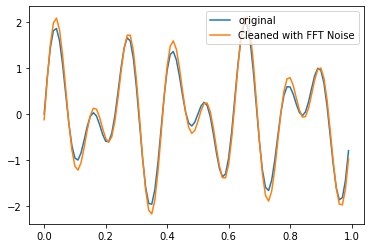

In [144]:
plt.plot(t,Func, label = 'original')
plt.plot(t,np.real(Func_Clean), label = 'Cleaned with FFT Noise')
plt.legend()
plt.show()

## Example 2.3 spectral derivatices

```matlab
n = 128;
L = 30;
dx = L/(n);
x = -L/2:dx:L/2-dx;
f = cos(x).* exp(-x.ˆ2/25);
df = -(sin(x).* exp(-x.ˆ2/25) + (2/25)*x.*f);
% Function
% Derivative
%% Approximate derivative using finite Difference...
for kappa=1:length(df)-1
dfFD(kappa) = (f(kappa+1)-f(kappa))/dx;
end
dfFD(end+1) = dfFD(end);
%% Derivative using FFT (spectral derivative)
fhat = fft(f);
kappa = (2* pi/L)*[-n/2:n/2-1];
kappa = fftshift(kappa); % Re-order fft frequencies
dfhat = i*kappa.*fhat;
dfFFT = real(ifft(dfhat));
%% Plotting commands
plot(x,df,’k’,’LineWidth’,1.5), hold on
plot(x,dfFD,’b--’,’LineWidth’,1.2)
plot(x,dfFFT,’r--’,’LineWidth’,1.2)
legend(’True Derivative’,’Finite Diff.’,’FFT Derivative’)
```